# PERFIL DOS CLIENTES DA FEDERAÇÃO DAS INDÚSTRIAS DE SC: UMA TAREFA DE CLUSTERIZAÇÃO
Deise Ferreira de Souza

Pós-graduação Lato Sensu em Ciência de Dados e Big Data

Pontifícia Universidade Católica De Minas Gerais

Objetivos

O objetivo deste estudo é por meio do uso de algoritmos de Machine Learning clusterizar os clientes das principais casas da FIESC, obter mais domínio sobre o perfil dos mesmos, contribuindo desta forma, para a definição de estratégias mais assertivas e eficazes de comunicação e relacionamento com os clientes.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
dataframe_fiesc_k = pd.read_excel("base_kmeans.xlsx")

# 1- Limpeza dos dados 
 A Análise exploratória foi realizada no algoritmo k-prototypes o qual utilizou a mesma base + a variável faturamento

In [4]:
dataframe_fiesc_k = dataframe_fiesc_k.drop(['cnpj'], axis = 1)

In [5]:
dataframe_fiesc_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21719 entries, 0 to 21718
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   produto      21719 non-null  object
 1   porte        21719 non-null  object
 2   setor        21719 non-null  object
 3   faturamento  21719 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 678.8+ KB


In [6]:
#Explorando os dados
for col in dataframe_fiesc_k.columns:
  print("Nome da coluna:", col)
  print("Lista de valores únicos:", dataframe_fiesc_k[col].unique())
  print("Total de valores únicos:", dataframe_fiesc_k[col].value_counts())
  print("Total de valores únicos:", dataframe_fiesc_k[col].nunique())
  if dataframe_fiesc_k[col].isnull().any():
    null_total = dataframe_fiesc_k[col].isnull().sum()
    total = len(dataframe_fiesc_k[col])
    porcent_null = (null_total/total)*100
    print(f"Tem {null_total} valores NULL; Correspondem a {porcent_null:.2f}% do total de valores dessa coluna")
  else:
    print("Não Tem NULL")
  print('-'*100)

Nome da coluna: produto
Lista de valores únicos: ['IEL' 'Educação' 'Tecnologia' 'Ensino Superior' 'Qualificação'
 'Ensino Técnico' 'SEGURANÇA E SAÚDE NO TRABALHO' 'Saúde Assistencial'
 'PROMOÇÃO DA SAÚDE' 'Ensino básico']
Total de valores únicos: produto
SEGURANÇA E SAÚDE NO TRABALHO    5200
Saúde Assistencial               4952
Tecnologia                       4264
Qualificação                     2740
IEL                              1487
PROMOÇÃO DA SAÚDE                1452
Ensino Técnico                    561
Ensino Superior                   468
Ensino básico                     372
Educação                          223
Name: count, dtype: int64
Total de valores únicos: 10
Não Tem NULL
----------------------------------------------------------------------------------------------------
Nome da coluna: porte
Lista de valores únicos: ['Micro' 'Média' 'Pequena' 'Grande']
Total de valores únicos: porte
Pequena    8238
Micro      6858
Média      4678
Grande     1945
Name: count, dtype

In [7]:
#trandformando os dados em dummies
df_dummies = pd.get_dummies(dataframe_fiesc_k).astype(int)

In [8]:
df_dummies

,faturamento,produto_Educação,produto_Ensino Superior,produto_Ensino Técnico,produto_Ensino básico,produto_IEL,produto_PROMOÇÃO DA SAÚDE,produto_Qualificação,produto_SEGURANÇA E SAÚDE NO TRABALHO,produto_Saúde Assistencial,...,setor_SERVIÇOS DA SAÚDE,setor_SERVIÇOS DIVERSOS,setor_SERVIÇOS FINANCEIROS E DE SEGUROS,setor_SERVIÇOS IMOBILIÁRIOS,"setor_SERVIÇOS PROFISSIONAIS, CIENTÍFICOS E TÉCNICOS",setor_TIC,"setor_TRANSPORTE, ARMAZENAGEM E CORREIO","setor_TÊXTIL, CONFECÇÃO, COURO E CALÇADOS",setor_não definido,"setor_ÓLEO, GÁS E ELETRICIDADE"
0,9655,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,523,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,450,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,71766,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,300,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21714,715,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21715,715,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21716,597,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21717,597,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#padronizando os dados de faturamento
num_vars = ['faturamento']

scaler = MinMaxScaler()
df_dummies[num_vars] = scaler.fit_transform(df_dummies[num_vars].values)

In [41]:
#padronizando todos os dados
x = df_dummies.div(df_dummies.sum(axis=1),axis="rows")
x 

,faturamento,produto_Educação,produto_Ensino Superior,produto_Ensino Técnico,produto_Ensino básico,produto_IEL,produto_PROMOÇÃO DA SAÚDE,produto_Qualificação,produto_SEGURANÇA E SAÚDE NO TRABALHO,produto_Saúde Assistencial,...,setor_SERVIÇOS DA SAÚDE,setor_SERVIÇOS DIVERSOS,setor_SERVIÇOS FINANCEIROS E DE SEGUROS,setor_SERVIÇOS IMOBILIÁRIOS,"setor_SERVIÇOS PROFISSIONAIS, CIENTÍFICOS E TÉCNICOS",setor_TIC,"setor_TRANSPORTE, ARMAZENAGEM E CORREIO","setor_TÊXTIL, CONFECÇÃO, COURO E CALÇADOS",setor_não definido,"setor_ÓLEO, GÁS E ELETRICIDADE"
0,0.001932,0.0,0.0,0.0,0.0,0.332689,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000105,0.0,0.0,0.0,0.0,0.333298,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00009,0.0,0.0,0.0,0.0,0.333303,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.014184,0.0,0.0,0.0,0.0,0.328605,0.0,0.0,0.0,0.0,...,0.0,0.0,0.328605,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00006,0.0,0.0,0.0,0.0,0.333313,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21714,0.000143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21715,0.000143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333286,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21716,0.00012,0.0,0.0,0.0,0.0,0.0,0.333293,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21717,0.00012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2 - Modelagem - k-means

In [42]:
#modulo para o algoritmo de agrupamento
from sklearn.cluster import KMeans 

In [43]:
km = KMeans(n_clusters = 10)
km.fit_predict(x)

array([8, 4, 2, ..., 2, 6, 6])

In [44]:
#identificando o número ideal de cluster
distortions = []
n_clusters = range(2,15)
for n_clus in n_clusters:
    print(n_clus)
    distortions.append(KMeans(n_clusters=n_clus,max_iter=10_000,n_init=100, random_state=61658).fit(x).inertia_)

2
3
4
5
6
7
8
9
10
11
12
13
14


In [45]:
distortions

[5143.635267568996,
 4517.553478048987,
 4210.975258249127,
 3990.273641830218,
 3776.1521533371847,
 3597.997560296523,
 3454.2255470888776,
 3318.3462632760416,
 3235.5974624506275,
 3136.8113145345324,
 3019.386365384806,
 2970.968828509119,
 2888.35615597207]

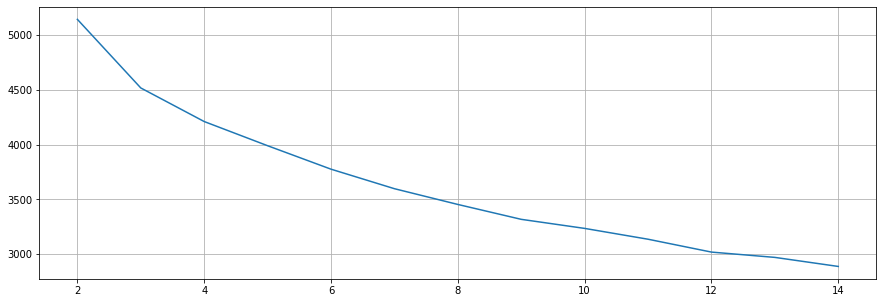

In [46]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distortions)
plt.grid()

In [47]:
#escolhendo o numero ideal de cluster
kmeans = KMeans(n_clusters=3,max_iter=10_000,n_init=100, random_state=61658)
x_tr = kmeans.fit_predict(x)
x_tr

array([0, 2, 1, ..., 1, 1, 1])

In [49]:
#criando um novo df com a informação do cluster
final = dataframe_fiesc_k.copy()
final['cluster'] = x_tr

In [50]:
labels = {0: "Primeiro", 1: "Segundo", 2: "Terceiro"}
final['cluster'] = final['cluster'].map(labels)

In [51]:
final

,produto,porte,setor,faturamento,cluster
0,IEL,Micro,INDÚSTRIA GRÁFICA,9655,Primeiro
1,IEL,Média,ALIMENTOS E BEBIDAS,523,Terceiro
2,IEL,Pequena,ALIMENTOS E BEBIDAS,450,Segundo
3,IEL,Pequena,SERVIÇOS FINANCEIROS E DE SEGUROS,71766,Segundo
4,IEL,Micro,"ARTES, CULTURA E ESPORTE",300,Primeiro
...,...,...,...,...,...
21714,Saúde Assistencial,Pequena,SANEAMENTO BÁSICO,715,Segundo
21715,SEGURANÇA E SAÚDE NO TRABALHO,Pequena,SANEAMENTO BÁSICO,715,Segundo
21716,PROMOÇÃO DA SAÚDE,Pequena,SANEAMENTO BÁSICO,597,Segundo
21717,Saúde Assistencial,Pequena,SANEAMENTO BÁSICO,597,Segundo


In [52]:
# explorar as variáveis agrupadas por cluster para descrever os clusters
print(final.groupby('cluster').agg({'produto': 'value_counts'}))
print(final.groupby('cluster').agg({'porte': 'value_counts'}))
print(final.groupby('cluster').agg({'setor': 'value_counts'}))
print(final.groupby('cluster').agg({'faturamento': 'median'})) # MEDIANA

                                        produto
cluster  produto                               
Primeiro SEGURANÇA E SAÚDE NO TRABALHO     2317
         Saúde Assistencial                1488
         Tecnologia                        1348
         Qualificação                       626
         IEL                                586
         PROMOÇÃO DA SAÚDE                  248
         Ensino Técnico                     101
         Ensino Superior                     68
         Ensino básico                       58
         Educação                            18
Segundo  Saúde Assistencial                2261
         SEGURANÇA E SAÚDE NO TRABALHO     1855
         Tecnologia                        1568
         Qualificação                      1037
         PROMOÇÃO DA SAÚDE                  592
         IEL                                431
         Ensino Técnico                     199
         Ensino Superior                    132
         Ensino básico                  

# 3- Interpretação dos resultados

In [18]:
import  plotly.express  as  px 
import matplotlib.pyplot as plt
cores_hex = ['#081d58', '#253494', '#225ea8', '#1d91c0', '#41b6c4', '#7fcdbb', '#c7e9b4', '#edf8b1', '#ffffd9', '#ffffd9']

# Total de cada Cluster

In [19]:
df_total = final['cluster'].value_counts()
df_total

cluster
Segundo     8238
Primeiro    6858
Terceiro    6623
Name: count, dtype: int64

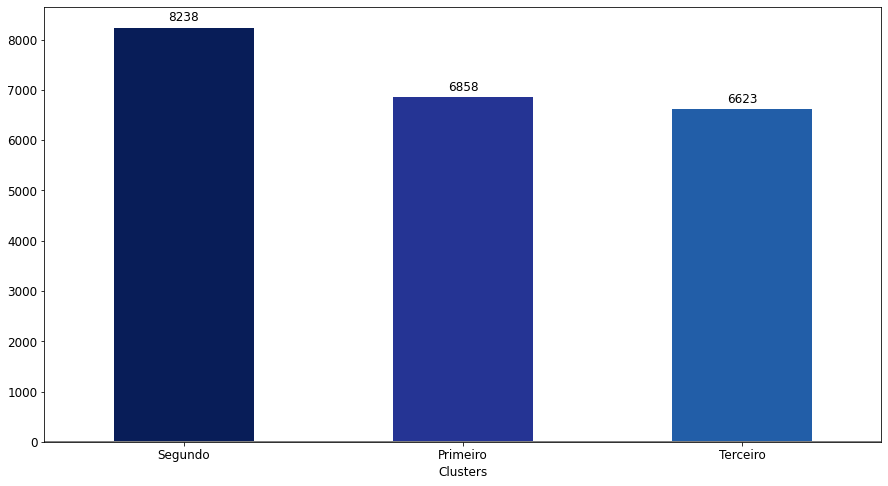

In [31]:
ax = df_total.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')
plt.show()

# Média Geral

In [50]:
df_media = final_d.groupby('cluster').mean()
df_media

,faturamento,produto_Educação,produto_Ensino Superior,produto_Ensino Técnico,produto_Ensino básico,produto_IEL,produto_PROMOÇÃO DA SAÚDE,produto_Qualificação,produto_SEGURANÇA E SAÚDE NO TRABALHO,produto_Saúde Assistencial,...,setor_SERVIÇOS DA SAÚDE,setor_SERVIÇOS DIVERSOS,setor_SERVIÇOS FINANCEIROS E DE SEGUROS,setor_SERVIÇOS IMOBILIÁRIOS,"setor_SERVIÇOS PROFISSIONAIS, CIENTÍFICOS E TÉCNICOS",setor_TIC,"setor_TRANSPORTE, ARMAZENAGEM E CORREIO","setor_TÊXTIL, CONFECÇÃO, COURO E CALÇADOS",setor_não definido,"setor_ÓLEO, GÁS E ELETRICIDADE"
cluster,,,,,,,,,,,,,,,,,,,,,
Primeiro,0.000000,0.002625,0.009915,0.014727,0.008457,0.085448,0.036162,0.091280,0.337854,0.216973,...,0.024059,0.052056,0.012832,0.009332,0.070866,0.030767,0.039224,0.066492,0.000729,0.002770
Segundo,0.000000,0.006555,0.016023,0.024156,0.013231,0.052319,0.071862,0.125880,0.225176,0.274460,...,0.007647,0.009590,0.008254,0.003520,0.026706,0.025006,0.018087,0.145909,0.000486,0.008012
Terceiro,0.000453,0.022799,0.040465,0.039408,0.030953,0.070965,0.092405,0.162615,0.155217,0.181640,...,0.010418,0.013438,0.011626,0.000151,0.012532,0.019327,0.020836,0.173788,0.000302,0.008908


# Porte por Cluster

In [51]:
df_porte = final_d.groupby('cluster').mean().filter(like='porte')
df_porte_percentual = df_porte.div(df_porte.sum(axis=1), axis=0) * 100
df_porte_percentual = df_porte_percentual.round(2)

df_porte_percentual

,porte_Grande,porte_Micro,porte_Média,porte_Pequena
cluster,,,,
Primeiro,0.00,100.0,0.00,0.0
Segundo,0.00,0.0,0.00,100.0
Terceiro,29.37,0.0,70.63,0.0


In [52]:
df_porte_percentual_1 = df_porte_percentual.iloc[[0]].copy()
df_porte_percentual_sorted_1 = df_porte_percentual_1.T.sort_values(by='Primeiro', ascending=False).T

df_porte_percentual_2 = df_porte_percentual.iloc[[1]].copy()
df_porte_percentual_sorted_2 = df_porte_percentual_2.T.sort_values(by='Segundo', ascending=False).T

df_porte_percentual_3 = df_porte_percentual.iloc[[2]].copy()
df_porte_percentual_sorted_3 = df_porte_percentual_3.T.sort_values(by='Terceiro', ascending=False).T

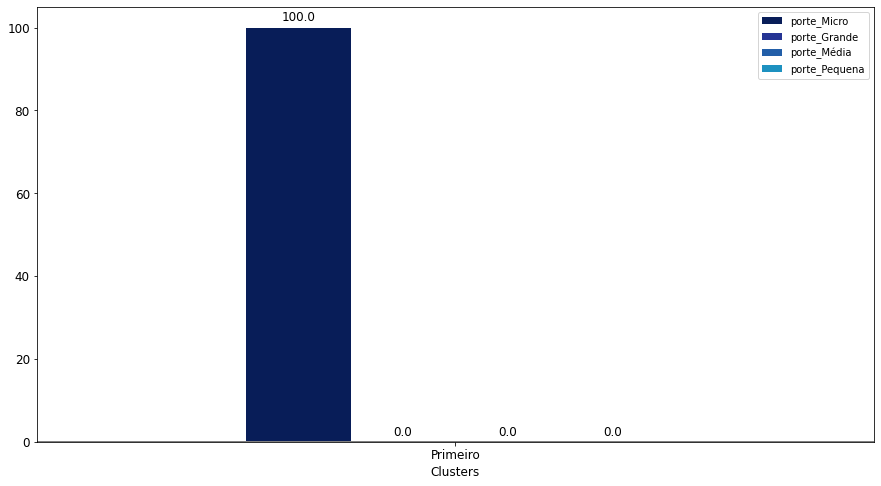

In [53]:
ax = df_porte_percentual_sorted_1.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

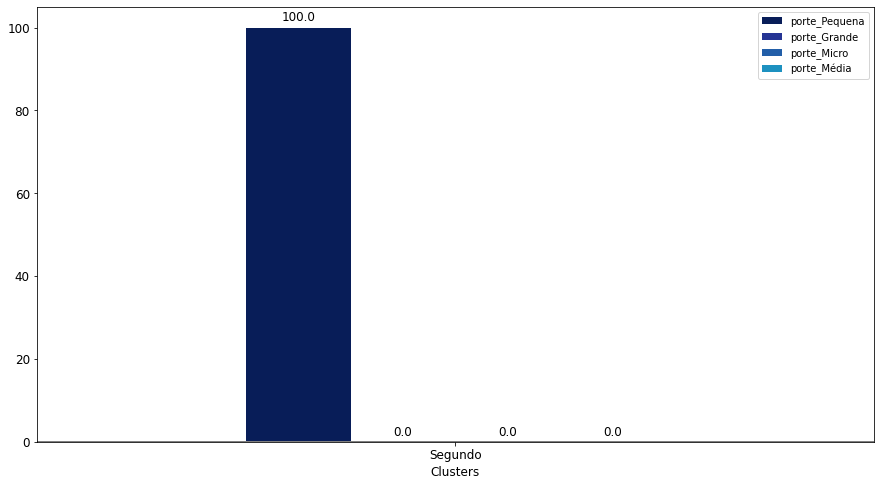

In [54]:
ax = df_porte_percentual_sorted_2.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

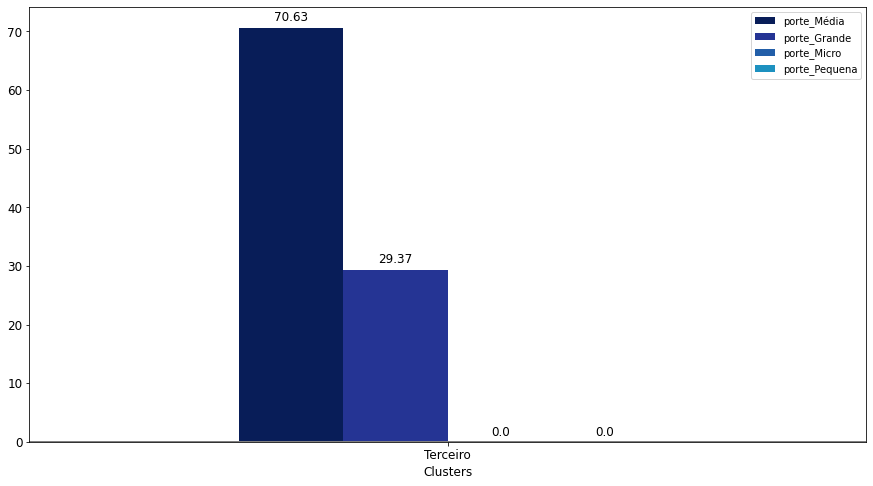

In [55]:
ax = df_porte_percentual_sorted_3.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

# Produto por Cluster

In [56]:
df_produto = final_d.groupby('cluster').mean().filter(like='produto')
df_produto_percentual = df_produto.div(df_produto.sum(axis=1), axis=0) * 100
df_produto_percentual = df_produto_percentual.round(2)
df_produto_percentual

,produto_Educação,produto_Ensino Superior,produto_Ensino Técnico,produto_Ensino básico,produto_IEL,produto_PROMOÇÃO DA SAÚDE,produto_Qualificação,produto_SEGURANÇA E SAÚDE NO TRABALHO,produto_Saúde Assistencial,produto_Tecnologia
cluster,,,,,,,,,,
Primeiro,0.26,0.99,1.47,0.85,8.54,3.62,9.13,33.79,21.70,19.66
Segundo,0.66,1.60,2.42,1.32,5.23,7.19,12.59,22.52,27.45,19.03
Terceiro,2.28,4.05,3.94,3.10,7.10,9.24,16.26,15.52,18.16,20.35


In [57]:
df_produto_percentual_1 = df_produto_percentual.iloc[[0]].copy()
df_produto_percentual_sorted_1 = df_produto_percentual_1.T.sort_values(by='Primeiro', ascending=False).T

df_produto_percentual_2 = df_produto_percentual.iloc[[1]].copy()
df_produto_percentual_sorted_2 = df_produto_percentual_2.T.sort_values(by='Segundo', ascending=False).T

df_produto_percentual_3 = df_produto_percentual.iloc[[2]].copy()
df_produto_percentual_sorted_3 = df_produto_percentual_3.T.sort_values(by='Terceiro', ascending=False).T

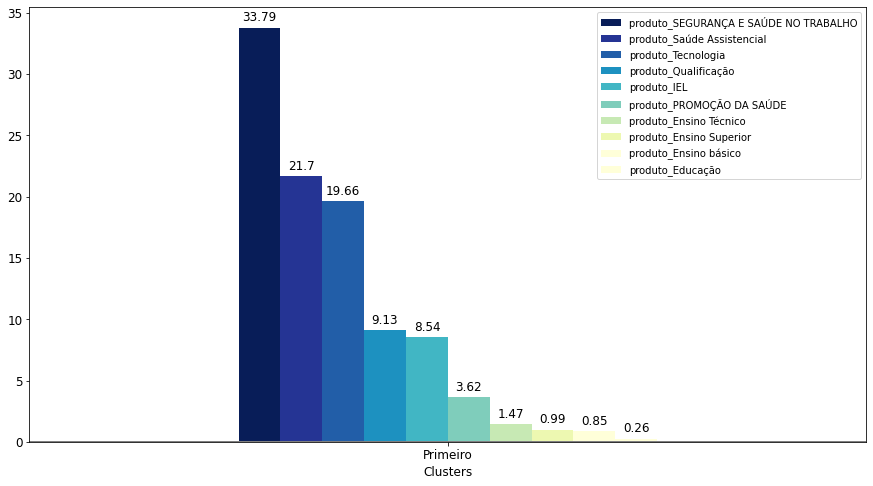

In [59]:
ax = df_produto_percentual_sorted_1.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

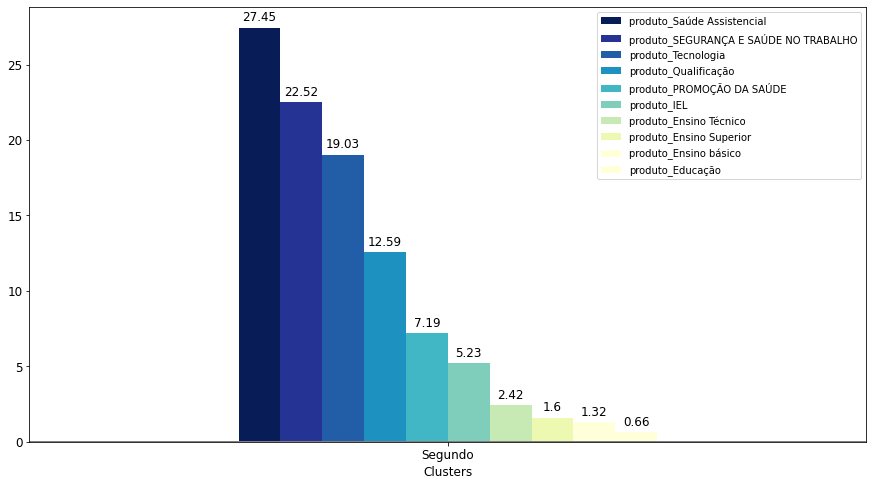

In [60]:
ax = df_produto_percentual_sorted_2.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

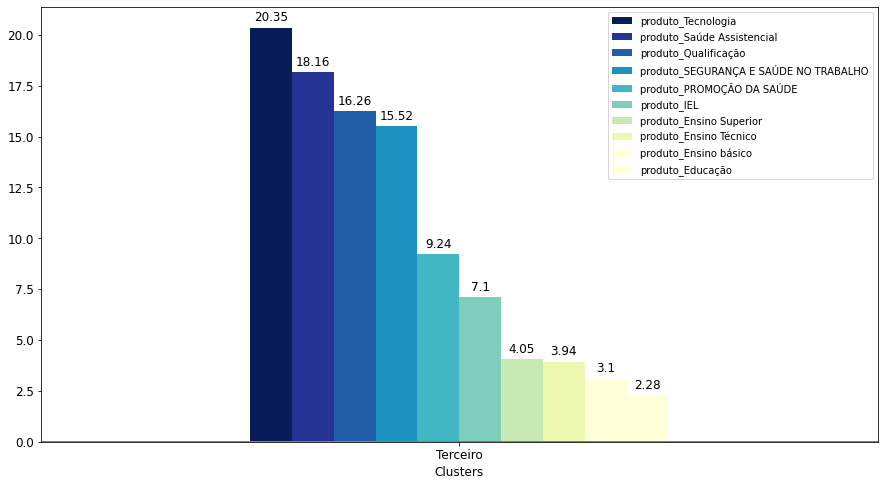

In [58]:
ax = df_produto_percentual_sorted_3.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

# Setor por Cluster

In [22]:
df_setor = final_d.groupby('cluster').sum().filter(like='setor')
df_setor_percentual = df_setor.div(df_setor.sum(axis=1), axis=0) * 100
df_setor_percentual = df_setor_percentual.round(2)
df_setor_percentual

,setor_AGROPECUÁRIA,setor_ALIMENTOS E BEBIDAS,setor_ALOJAMENTO E ALIMENTAÇÃO,"setor_ARTES, CULTURA E ESPORTE",setor_AUTOMOTIVA,setor_CELULOSE E PAPEL,setor_CERÂMICA,setor_COMÉRCIO DE VEÍCULOS AUTOMOTORES,setor_COMÉRCIO POR ATACADO,setor_COMÉRCIO VAREJISTA,...,setor_SERVIÇOS DA SAÚDE,setor_SERVIÇOS DIVERSOS,setor_SERVIÇOS FINANCEIROS E DE SEGUROS,setor_SERVIÇOS IMOBILIÁRIOS,"setor_SERVIÇOS PROFISSIONAIS, CIENTÍFICOS E TÉCNICOS",setor_TIC,"setor_TRANSPORTE, ARMAZENAGEM E CORREIO","setor_TÊXTIL, CONFECÇÃO, COURO E CALÇADOS",setor_não definido,"setor_ÓLEO, GÁS E ELETRICIDADE"
cluster,,,,,,,,,,,,,,,,,,,,,
Primeiro,0.71,4.23,1.43,1.49,0.67,0.82,2.23,4.56,8.25,11.33,...,2.41,5.21,1.28,0.93,7.09,3.08,3.92,6.65,0.07,0.28
Segundo,0.59,7.49,0.49,0.30,1.30,1.86,3.90,2.63,5.21,4.07,...,0.76,0.96,0.83,0.35,2.67,2.50,1.81,14.59,0.05,0.80
Terceiro,0.45,10.58,0.23,0.18,3.64,3.26,2.67,0.30,2.40,2.39,...,1.04,1.34,1.16,0.02,1.25,1.93,2.08,17.38,0.03,0.89


In [23]:
df_setor_percentual_1 = df_setor_percentual.iloc[[0]].copy()
df_setor_percentual_sorted_1 = df_setor_percentual_1.T.sort_values(by='Primeiro', ascending=False).T

df_setor_percentual_2 = df_setor_percentual.iloc[[1]].copy()
df_setor_percentual_sorted_2 = df_setor_percentual_2.T.sort_values(by='Segundo', ascending=False).T

df_setor_percentual_3 = df_setor_percentual.iloc[[2]].copy()
df_setor_percentual_sorted_3 = df_setor_percentual_3.T.sort_values(by='Terceiro', ascending=False).T

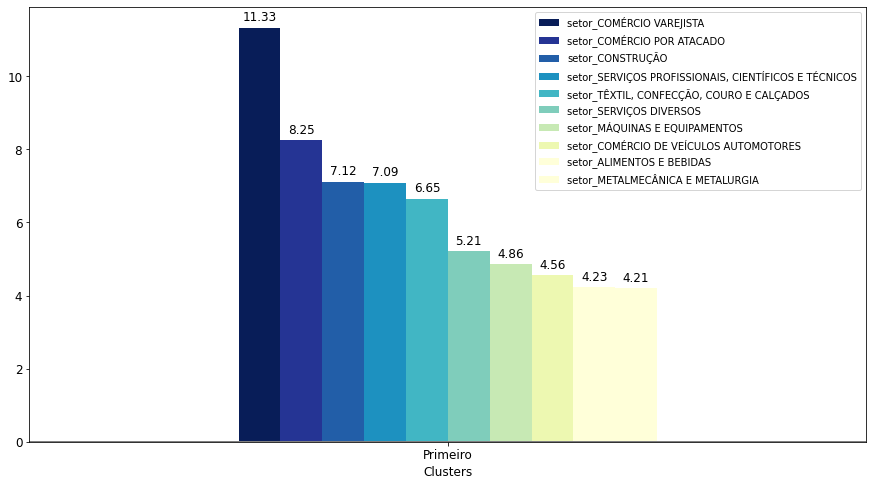

In [24]:
df_1_top_5 = df_setor_percentual_sorted_1.iloc[:, :10]  # Seleciona as cinco primeiras colunas

ax = df_1_top_5.plot(kind='bar', figsize=(15, 8), color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')

plt.show()

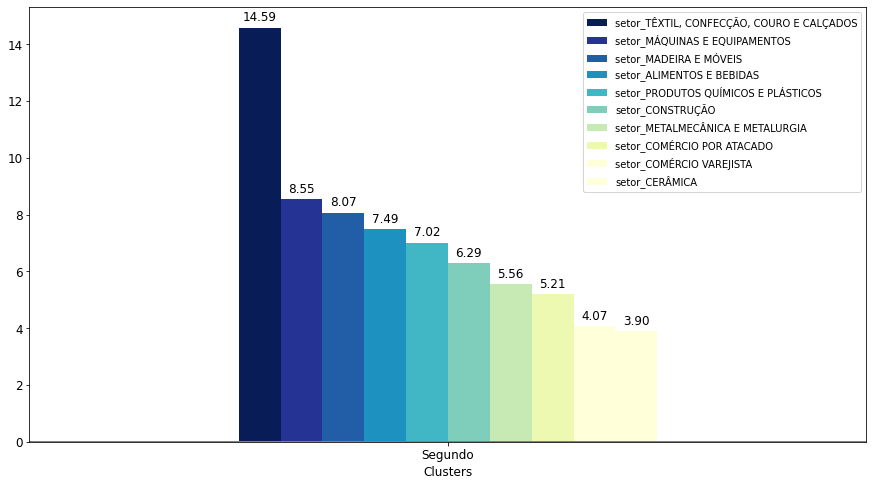

In [25]:
df_1_top_5 = df_setor_percentual_sorted_2.iloc[:, :10]  # Seleciona as cinco primeiras colunas

ax = df_1_top_5.plot(kind='bar', figsize=(15, 8), color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')

plt.show()

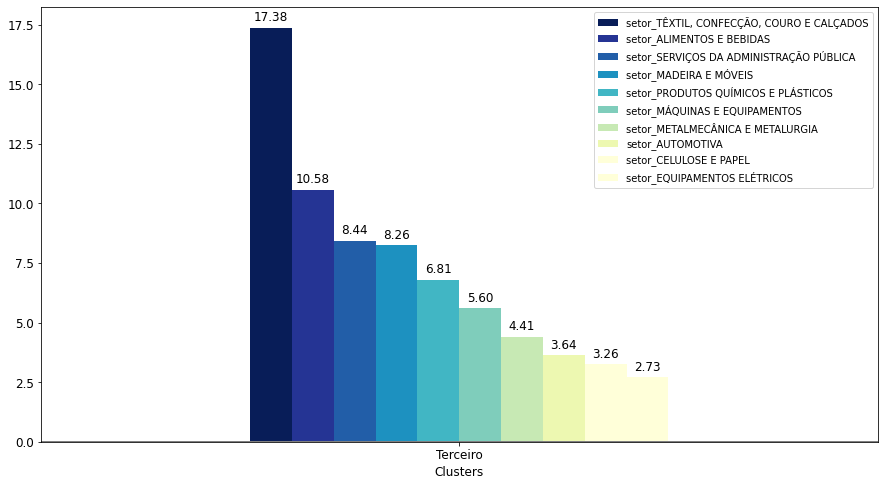

In [26]:
df_1_top_5 = df_setor_percentual_sorted_3.iloc[:, :10]  # Seleciona as cinco primeiras colunas

ax = df_1_top_5.plot(kind='bar', figsize=(15, 8), color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')

plt.show()

# Faturamento por Cluster

In [67]:
final_fat = dataframe_fiesc_k.copy()
final_fat['cluster'] = x_tr

In [69]:
labels = {0: "Primeiro", 1: "Segundo", 2: "Terceiro"}
final_fat['cluster'] = final_fat['cluster'].map(labels)

In [ ]:
final_fat['cluster'] = final_fat['cluster'].astype('category')

In [71]:
final_fat.groupby('cluster')[['faturamento']].mean()

,faturamento
cluster,
Primeiro,4920.945611
Segundo,6304.556810
Terceiro,22577.986260


In [72]:
final_fat.groupby('cluster')[['faturamento']].median()

,faturamento
cluster,
Primeiro,1474.5
Segundo,1978.0
Terceiro,4416.0


# Primeiro Cluster:

31% dos clientes

porte: micro
(100%) 

produto: sst 
(33,79%)
assistencial
(19,66%)
tecnologia
(9,13%)
qualificação
(8,54%)

setor: Comércio e Serviços (43,56%)
    
faturamento (média/mediana): 4.920/1.474



# Segundo Cluster: 

37% dos clientes

porte: pequena
(100%) 

produto: assistencial (27,45%)
sst
(22,52%)
tecnologia
(19,03%)
qualificação (12,59%)

setor: Indústria da transf. (textil 14,59%, máquinas 8,55%, madeira móveis 8,07%, alimentos 7,49%)
    
faturamento (média/mediana) 6.304/1.978



# Terceiro Cluster:

30% dos clientes

porte: médias (70,63%) e grandes (29,37%)
    
produto: tecnologia
(20,35%)
assistencial
(18,16%)
qualificação
(16,26%)
sst
(15,52%)

setor: Têxtil
(17,38%), alimentos e bebidas (10,58%)
serviços
(8,44%)

faturamento (média/mediana) 22.577/4.416

